In [9]:
%matplotlib notebook

In [9]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib as pltimport 
import matplotlib.pyplot as plt
from sklearn import linear_model 
from textblob import TextBlob, Word, Blobber
from textblob.classifiers import NaiveBayesClassifier
from textblob.taggers import NLTKTagger
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_csv("Denmarkdata.csv")
df

In [13]:
# splitting timestamp column
df1 = pd.concat([df['tweet_timestamp'].str.split(' ', expand=True)], axis= 1)
                
# renaming split columns
df1.rename(columns={0:'col_1', 1:'col_2'},inplace=True)

# drop second column
df1.drop('col_2', axis=1, inplace=True)

# merge with d
df2 = df.append(df1)

In [14]:
# Deleting redundant columns 
df = df.iloc[: , 1:]

# Splitting timestamp and replacing it in df
df['tweet_timestamp'] = df['tweet_timestamp'].str.split(' ').str[0]

In [31]:
# to date type
df['tweet_timestamp'] = pd.to_datetime(df.tweet_timestamp)
#df['tweet_timestamp']=df['tweet_timestamp'].map(dt.datetime.toordinal)
#df = df.iloc[: , 1:]
df

df.to_csv('cleansedDenmark.csv')

In [ ]:
profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)
profile.to_notebook_iframe()

NameError: name 'df' is not defined

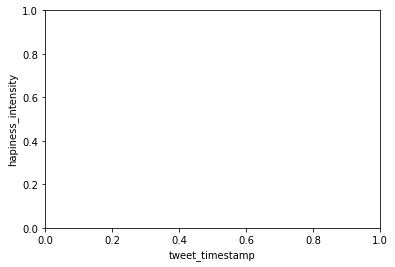

In [35]:
%matplotlib inline
plt.xlabel('tweet_timestamp')
plt.ylabel('hapiness_intensity')
plt.scatter(df.tweet_timestamp, df.happiness_intensity, color='blue', marker='+')

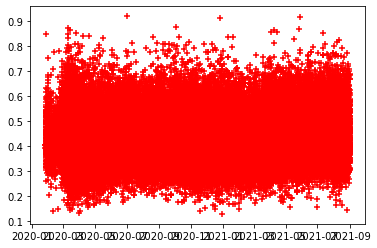

In [36]:
plt.scatter(df.tweet_timestamp, df.anger_intensity, color='red', marker='+')

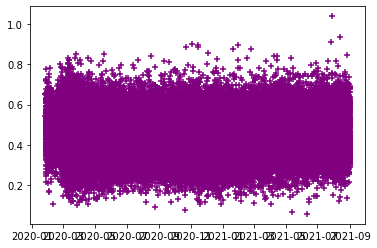

In [37]:
plt.scatter(df.tweet_timestamp, df.fear_intensity, color='purple', marker='+')

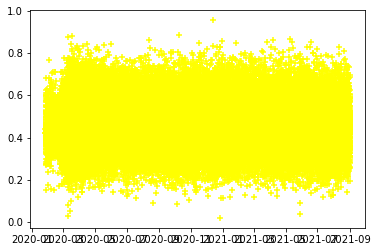

In [38]:
plt.scatter(df.tweet_timestamp, df.valence_intensity, color='yellow', marker='+')

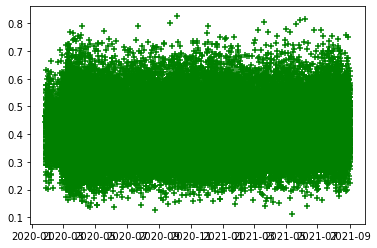

In [122]:
plt.scatter(df.tweet_timestamp, df.sadness_intensity, color='green', marker='+')

In [29]:
# GROUP BY SAME USER ON THE SAME DAY
# g = df.groupby(['hour_utc','minute_utc','username'])
# This means that only rows that have the same value of hour_utc, minute_utc, 
# username can be considered an occurrence of the same category.
%matplotlib inline
g = df.groupby(['emotion','tweet_timestamp'])

#count the occurences of emotion-category per unique day 
#tweet_cnt = g.emotion[fear] / emotion[anger] / emotion[happiness].nunique()
tweet_cnt = g.tweet_timestamp.nunique()
tweet_cnt.head()

#plot heatmap
#sns.heatmap(dt_tweet_cnt)
#plt.show()

emotion  tweet_timestamp
anger    2020-01-28         1
         2020-01-29         1
         2020-01-30         1
         2020-01-31         1
         2020-02-01         1
Name: tweet_timestamp, dtype: int64

In [35]:
df.describe()

,user_id,valence_intensity,fear_intensity,anger_intensity,happiness_intensity,sadness_intensity
count,1.032190e+05,103219.000000,103219.000000,103219.000000,103219.000000,103219.000000
mean,3.291027e+17,0.464750,0.439380,0.438897,0.306337,0.407404
std,4.969530e+17,0.093396,0.095674,0.081142,0.093086,0.078352
min,3.860000e+03,0.019000,0.057000,0.130000,-0.013000,0.112000
25%,9.517435e+07,0.403000,0.371000,0.385000,0.243000,0.353000
50%,1.015290e+09,0.466000,0.435000,0.434000,0.304000,0.400000
75%,8.361417e+17,0.524000,0.505000,0.489000,0.361000,0.456000
max,1.426223e+18,0.957000,1.038000,0.921000,0.874000,0.826000


In [16]:
# function to get subjectivity
def GetSubjectivity(text):
    return TextBlob(text).Sentiment.Subjectivty

# function getting polarity 
def GetPolarity(text):
    return TextBlob(text).sentiment.polarity

In [3]:
df['happiness_intensity'].apply(GetSubjectivity)
df['happiness_intensity'].apply(GetPolarity)

NameError: name 'df' is not defined

In [36]:
df['tweet_timestamp'] = df['tweet_timestamp'].map(dt.datetime.toordinal)

<AxesSubplot:xlabel='tweet_timestamp'>

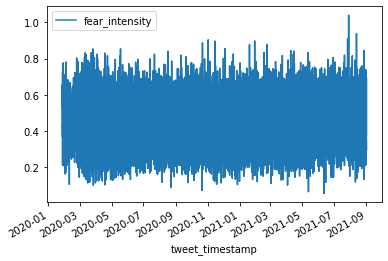

In [23]:
%matplotlib inline
df.plot(x = 'tweet_timestamp', y = 'fear_intensity')

Text(0, 0.5, 'sentiment')

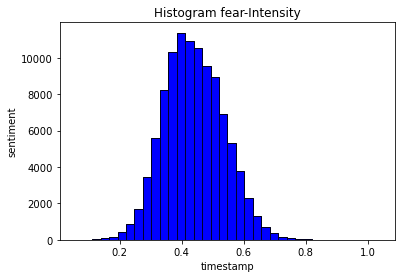

In [29]:
# Import the libraries
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib histogram
plt.hist(df['fear_intensity'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))

# seaborn histogram
sns.distplot(df['fear_intensity'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram fear-Intensity')
plt.xlabel('timestamp')
plt.ylabel('sentiment')

<AxesSubplot:>

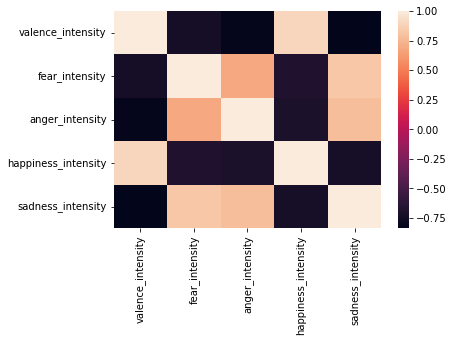

In [49]:
%matplotlib inline
correlaties = df.corr()
sns.heatmap(correlaties)

In [26]:
infection_denmark = pd.read_csv('https://raw.githubusercontent.com/samkooijman/covid-data/main/Data%20dictionaries/Denmark/infections_denmark/confirmed_cases_denmark_per_region.csv', encoding = 'unicode_escape', delimiter = ';')
infection_denmark = infection_denmark.rename(columns={"Region" : "region", "Prøvetagningsdato": "tweet_timestamp", "Køn" : "gender", "Bekræftede tilfælde" : "confirmed_cases", "Døde" : "deaths"})
infection_denmark = infection_denmark.iloc[: , 0 : 5]
infection_denmark

,region,tweet_timestamp,gender,confirmed_cases,deaths
0,Sjælland,26-2-2020,M,1,0
1,Hovedstaden,27-2-2020,M,1,0
2,Midtjylland,28-2-2020,M,1,0
3,Hovedstaden,1-3-2020,M,1,0
4,Hovedstaden,2-3-2020,M,2,0
...,...,...,...,...,...
5507,Midtjylland,4-10-2021,M,36,0
5508,Nordjylland,4-10-2021,M,8,0
5509,Sjælland,4-10-2021,M,20,0
5510,Syddanmark,4-10-2021,M,39,0


In [24]:
sentiment_denmark = pd.read_csv('denmarksentimentframe')
sentiment_denmark = sentiment_denmark.iloc[: , 1:]
sentiment_denmark['tweet_timestamp'] = sentiment_denmark.to_datetime(sentiment_denmark.tweet_timestamp)

PredictionModel
#sentiment_denmark.set_index('tweet_timestamp')


FileNotFoundError: [Errno 2] No such file or directory: 'denmarksentimentframe'

In [ ]:
#PredictionModel = (pd.merge(sentiment_denmark, infection_denmark, on='tweet_timestamp'))
PredictionModel['tweet_timestamp'] = PredictionModel.to_datetime(PredictionModel.tweet_timestamp)


NameError: name 'pd' is not defined

<AxesSubplot:>

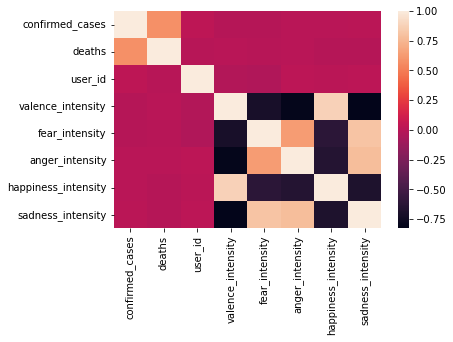

In [81]:
merged = infection_denmark.join(df, lsuffix="_left")
%matplotlib inline
correlaties = merged.corr()
sns.heatmap(correlaties)

In [27]:
data_path = pd.read_csv('https://raw.githubusercontent.com/samkooijman/covid-data/main/Data%20dictionaries/Denmark/infections_denmark/confirmed_cases_denmark_per_region.csv', encoding = 'unicode_escape', delimiter = ';')
infection_denmark = infection_denmark.rename(columns={"Region" : "region", "Prøvetagningsdato": "date", "Køn" : "gender", "Bekræftede tilfælde" : "confirmed_cases", "Døde" : "deaths"})
infection_denmark = infection_denmark.iloc[: , 0 : 5]
infection_denmark.to_csv('denmark_infec.csv')

In [28]:
def plot_confusion_matrix(conf_mat,
                          hide_spines=False,
                          hide_ticks=False,
                          figsize=None,
                          cmap=None,
                          colorbar=False,
                          show_absolute=True,
                          show_normed=False,
                          class_names=None,
                          figure=None,
                          axis=None):
    
    if not (show_absolute or show_normed):
        raise AssertionError('Both show_absolute and show_normed are False')
    if class_names is not None and len(class_names) != len(conf_mat):
        raise AssertionError('len(class_names) should be equal to number of'
                             'classes in the dataset')

    total_samples = conf_mat.sum(axis=1)[:, np.newaxis]
    normed_conf_mat = conf_mat.astype('float') / total_samples

    if figure is None and axis is None:
        fig, ax = plt.subplots(figsize=figsize)
    elif axis is None:
        fig = figure
        ax = fig.add_subplot(1, 1, 1)
    else:
        fig, ax = figure, axis

    ax.grid(False)
    if cmap is None:
        cmap = plt.cm.Blues

    if figsize is None:
        figsize = (len(conf_mat)*1.25, len(conf_mat)*1.25)

    if show_normed:
        matshow = ax.matshow(normed_conf_mat, cmap=cmap)
    else:
        matshow = ax.matshow(conf_mat, cmap=cmap)

    if colorbar:
        fig.colorbar(matshow)

    for i in range(conf_mat.shape[0]):
        for j in range(conf_mat.shape[1]):
            cell_text = ""
            if show_absolute:
                cell_text += format(conf_mat[i, j], 'd')
                if show_normed:
                    cell_text += "\n" + '('
                    cell_text += format(normed_conf_mat[i, j], '.2f') + ')'
            else:
                cell_text += format(normed_conf_mat[i, j], '.2f')
            if show_normed:
                ax.text(x=j,
                        y=i,
                        s=cell_text,
                        va='center',
                        ha='center',
                        color="white" if normed_conf_mat[i, j] > 0.5
                        else "black")
            else:
                ax.text(x=j,
                        y=i,
                        s=cell_text,
                        va='center',
                        ha='center',
                        color="white" if conf_mat[i, j] > np.max(conf_mat)/2
                        else "black")
    if class_names is not None:
        tick_marks = np.arange(len(class_names))
        plt.xticks(tick_marks, class_names, rotation=45)
        plt.yticks(tick_marks, class_names)

    if hide_spines:
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    if hide_ticks:
        ax.axes.get_yaxis().set_ticks([])
        ax.axes.get_xaxis().set_ticks([])

    plt.xlabel('predicted label')
    plt.ylabel('true label')
    return fig, ax

def plot_feature_importance(data_x, clf):
    df = pd.DataFrame({'variables': data_x.columns, 'importance': clf.feature_importances_})
    df_imp = df.sort_values(by = ['importance'], ascending=False).head(10).iloc[::-1]
    
    plt.barh(df_imp.variables, df_imp.importance)
    plt.xlabel("Feature importance")
    plt.title("Most important features found in the Random Forest")

def read_data():
    data = pd.read_csv(data_path)
    data_x = data.drop(['deaths'], axis = 1)
    data_y = data['deaths']
    data_x = pd.get_dummies(data_x)
    return data_x, data_y

def run_settings(settings):
    # Perform data preparations

    data_x, data_y = read_data()
    train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, train_size=settings['Split ratio'], random_state=42)
    
    # Create and fit random forest
    random_forest =  RandomForestClassifier(n_estimators=settings['Number of trees'], max_features=settings['Maximum features'], random_state=42)
    random_forest.fit(train_x, train_y)

    #Generate predictions and plot confusion matrix
    pred_y = random_forest.predict_proba(test_x)

    return test_y.to_numpy(), pred_y[:,1], data_x, random_forest

In [29]:
data_path = 'denmark_infec.csv'

In [55]:
settings = {'Number of trees': 20, 
            'Split ratio' : 0.3,
            'Maximum features' : 1}
threshold = 0.29

In [56]:
# Put in data frame and make thresholds adaptable
test_y, pred_y, test_x, random_forest = run_settings(settings)
rounded_predictions = [1 if prediction >= threshold else 0 for prediction in pred_y]
rounded_predictions = np.array(rounded_predictions)

There are 502 deaths in the test set
There are 592 deaths predicted by the model (with chosen threshold of 0.29)


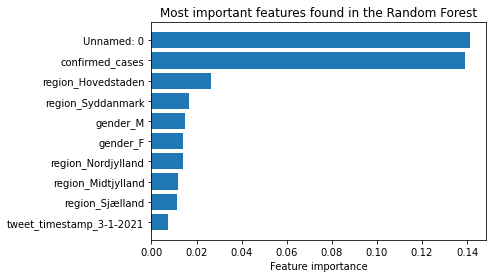

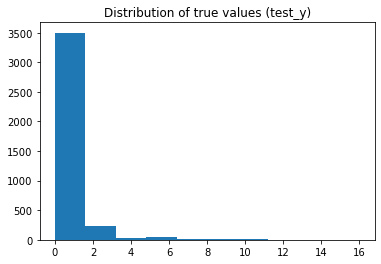

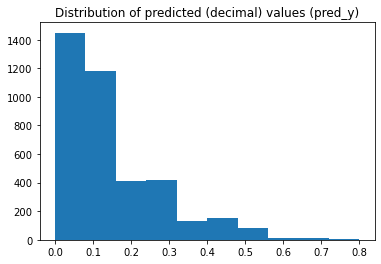

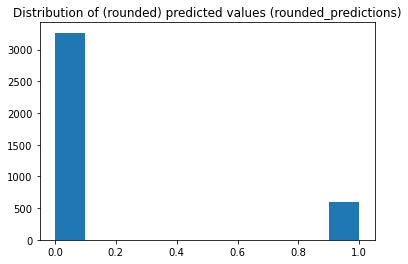

In [57]:
import matplotlib.pyplot as plt

plt.figure("1")
plot_feature_importance(test_x, random_forest)
plt.figure("2")
plt.hist(test_y)
plt.title("Distribution of true values (test_y)")
plt.figure("3")
plt.hist(pred_y,10)
plt.title("Distribution of predicted (decimal) values (pred_y)")
plt.figure("4")
plt.hist(rounded_predictions,10)
plt.title("Distribution of (rounded) predicted values (rounded_predictions)")

unique, counts = np.unique(test_y, return_counts=True)
true_defaults = counts[1] 
true_nondefaults = counts[0]
print("There are " +str(true_defaults)+" deaths in the test set")
unique_pred, counts_pred = np.unique(rounded_predictions, return_counts=True)
pred_defaults = counts_pred[1]
pred_nondefaults = counts_pred[0]
print("There are " +str(pred_defaults)+" deaths predicted by the model (with chosen threshold of "+str(threshold)+")")


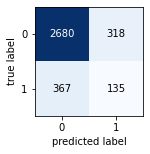

In [58]:
true_pos = 0
false_neg = 0
false_pos = 0
true_neg = 0

for true_label, pred_label in zip(test_y, rounded_predictions):
    if true_label == 1 and pred_label == 1:
        true_pos = true_pos + 1
    if true_label == 1 and pred_label == 0:
        false_neg = false_neg + 1
    if true_label == 0 and pred_label == 1:
        false_pos = false_pos + 1
    if true_label == 0 and pred_label == 0:
        true_neg = true_neg + 1

matrix = np.array([[true_neg, false_pos],
                   [false_neg, true_pos]])

fig, ax = plot_confusion_matrix(conf_mat=matrix, figsize=(2, 2))
plt.show()



ValueError: multi_class must be in ('ovo', 'ovr')

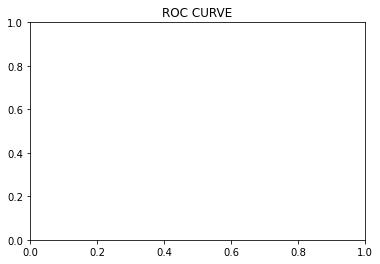

In [34]:
#plot ROC CURVE
plt.title('ROC CURVE')
plt.plot(roc_auc_score(test_y, pred_y))
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c="0.7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
fpr, tpr, threshold = roc_curve(test_y, pred_y)
plt.plot(fpr, tpr)
plt.show()

print("ROC and AUC =", roc_auc_score(test_y, pred_y))